## In this notebook we will explore what data is offered by Copernicus Satellites Sentinel-1

More detailed information can be found here: https://scihub.copernicus.eu/userguide/

### All data is classified in three levels based on the degree of processing

- Level 0 products consist of compressed and unfocused SAR raw data

- Level 1 products are produced by the Instrument Processing Facility (IPF), an outline of the production pipelin can be found here: https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-1-sar/product-types-processing-levels/level-1

- Level 2 products

## Sentinel-1 
- Level 0 and 1 products in acquisition mode:
    - Strip Map (SM)
    - Interferometric Wide Swath (IW)
    - Extra Wide Swath (EW)
- Level 2 products in acquisition mode:
    - Wave (WV)
    - Interferometric Wide Swath (IW)
    - Extra Wide Swath (EW) 

### These are then further split into:
[![Alt text](./images/Sentinel-1-SAR_Figure-1-Product-Levels-Modes.jpg)](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-1-sar/product-types-processing-levels)

Where:
- SLC: Single Look Complex
- GRD: Ground Range Detected
- OCN: Ocean

### The acquisition modes configurations:
 - SM: Acquires 80km wide data swaths with just above 5m x 5m spatial resolution at an incidence angle of 18.3 to 46.8 degrees with polarisation options HH + HV, VV + VH, HH, VV
 
 - IW: The main method by which land data is acquired, it acquires 250km swaths at 5m x 20m spatial resolution, it works by capturing three sub-swaths using the TOPSAR technique, the incidence angle ranges from 29.1 to 46 degrees and has the same polarization options as SM
 
 - EW: Acquires 410km swaths using the same methodology as IW but with 5 sub swaths with 20m x 40m spatial resolution at an incidence angle of 18.9 - 47 degrees with the same Polarization options as IW and SM

 - WV: Acquires 20km by 20km vignette's at 5m x 5m spatial resolution every 100km along the orbit at two alternating incidence angles, vignette's on the same angle are seperated by 200km, where the incidence angle varies between far and near range (23 and 36 degrees respectively). The polarization options here are HH and VV

All identifiers for the querry can be found here https://scihub.copernicus.eu/twiki/do/view/SciHubUserGuide/FullTextSearch?redirectedfrom=SciHubUserGuide.3FullTextSearch

Within it you can also find the naming conventions

In [1]:
# Here we will retrieve one example of each offered product level and display its quick look image
from sentinelsat import SentinelAPI
user = ''
password = ''

api = SentinelAPI(user, password, 'https://apihub.copernicus.eu/apihub')

## SM L0 Raw

In [4]:


#For top level products I would recommend filtering based on naming conventions

# This querry will look for products from the Sentinal 1A satelite, from beam 1, only RAW data (i.e. Level 0) the first _ denotes that resolution does not apply, then we denote processing level 0, then we denote product class for our purposes we will only need standard S, 
# then polarization HH+HV as DH, next would be start and end dates however we place the wildcard * to return all
products = api.query(platformname = 'Sentinel-1',
                     filename='S1A_S1_RAW__0SDH_*')

# We will use sort according to size and then download the first dataset that is not in the Long Term Archive (These must be requested 30 min in advance)
df = api.to_dataframe(products).sort_values(['size'], ascending=[True])
for i in range(len(df)):
    #Check if resource is online
    if api.is_online('{}'.format(df.index[i])):
        api.download('{}'.format(df.index[i]))
        #And break the i loop
        break
    else: pass

print('The File Name is {}'.format(df.iloc[i]['filename']))

Querying products: 100%|██████████| 362/362 [00:04<00:00, 54.02product/s]


The File Name is S1A_S1_RAW__0SDH_20210825T151230_20210825T151245_039387_04A712_3A2B.SAFE


In [5]:
# For this dataproduct I will not open any data as it is raw data, however a reference on how to open it is provided

import zipfile

with zipfile.ZipFile('S1A_S1_RAW__0SDH_20210825T151230_20210825T151245_039387_04A712_3A2B.SAFE'.replace('.SAFE','.zip')) as z:
    z.extractall()

 Within the new directory you can find a pdf report

 A manifest with specifications

 And 3 data files per polarization


However as this is raw data I will not go into opening it, but will refer you to the user manual https://sentinel.esa.int/documents/247904/685163/Sentinel-1-Level-0-Data-Decoding-Package.pdf/a8742c59-4914-40c4-8309-c77515649f17?t=1611589034672

## IW L1 SLC

In [4]:

# This querry will look for products from the Sentinal 1B satelite,in IW, only SLC data (i.e. Level 1) we do not care about the rest so place a wildcard * and a start date to reduce the number of returned products
products = api.query(platformname = 'Sentinel-1',
                     filename='S1B_IW_SLC*_2021*') #TODO: WHy does this not work anymore?
print(products)
# We will use sort according to size and then download the first dataset that is not in the Long Term Archive (These must be requested 30 min in advance)
try:
    df = api.to_dataframe(products).sort_values(['size'], ascending=[True])
except:
    print('Size not specified')
    df = api.to_dataframe(products)

for i in range(len(df)): #TODO: All offline retrieve seperate
    #Check if resource is online
    if api.is_online('{}'.format(df.index[i])):
        api.download('{}'.format(df.index[i]))
        #And break the i loop
        break
    else: pass

print('The File Name is {}'.format(df.iloc[i]['filename']))

Querying products: 113400product [09:21, 201.61product/s]


yes
The File Name is S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE


In [1]:
# 
import zipfile

with zipfile.ZipFile('S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE'.replace('.SAFE','.zip')) as z:
    z.extractall()

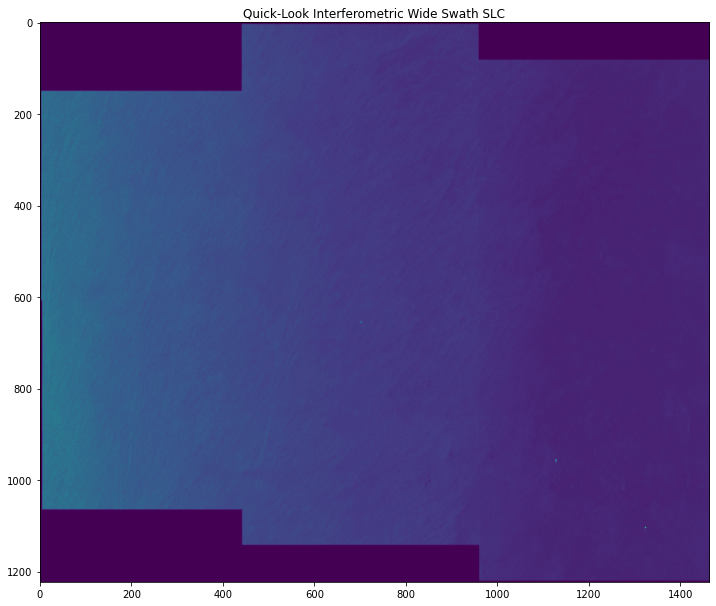

In [11]:
# First lets look at the quick look file
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
plt.title('Quick-Look Interferometric Wide Swath SLC')
plt.imshow(Image.open('S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/preview/quick-look.png'))
plt.show()

In [12]:
# We will also load some metadata
calibration_files = os.listdir('S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/support')
annotation_files = os.listdir('S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/annotation')


In [40]:
# We will need use a special module to load SOAP
import xmlschema

calibration = {}

for i in calibration_files:
    #We will assign each file to its name
    calibration[i.split('-')[-1][:-4:]] = xmlschema.XMLSchema(open(os.path.join('S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/support',i)).read(), base_url='S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/')


/tmp/ipykernel_52679/888076786.py:8: XMLSchemaIncludeWarning: Include schema failed: cannot access to resource 'file:///home/felix/Hackathon2021RUG/S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/s1-object-types.xsd': [Errno 2] No such file or directory: '/home/felix/Hackathon2021RUG/S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/s1-object-types.xsd'.
  calibration[i.split('-')[-1][:-4:]] = xmlschema.XMLSchema(open(os.path.join('S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/support',i)).read(), base_url='S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/')


XMLSchemaParseError: global xs:simpleType/xs:complexType 'unsignedInt' not found:

Schema:

  <xsd:attribute xmlns:xsd="http://www.w3.org/2001/XMLSchema" name="count" type="unsignedInt" use="required">
    <xsd:annotation>
      <xsd:documentation>Number of antenna pattern records within the list.</xsd:documentation>
    </xsd:annotation>
  </xsd:attribute>

Path: /xsd:schema/xsd:complexType[2]/xsd:attribute


In [39]:
calibration['calibration']

XMLSchema10(namespace='')

In [31]:
for i in calibration['types'].keys():
    print(calibration['types'][i])

http://www.w3.org/2001/XMLSchema
qualified
unqualified
[]
[]
[{'@name': 'absOrbitNumberType', 'xsd:annotation': {'xsd:appinfo': ['CONVERT_TYPE_DEC: typedef unsigned int SPF_ObjectTypes_AbsOrbitNumberType;', 'CONVERT_FUNC_DEC: SKIP', 'CONVERT_FUNC_DEF: SKIP'], 'xsd:documentation': ['Absolute orbit number type.']}, 'xsd:restriction': {'@base': 'string', 'xsd:pattern': {'@value': '[1-9][0-9]{0,5}'}}}, {'@name': 'aocsOpModeType', 'xsd:annotation': {'xsd:appinfo': ['CONVERT_FUNC_DEC: SKIP', 'CONVERT_FUNC_DEF: SKIP'], 'xsd:documentation': ['Enumeration of the available AOCS operational mode from the pointing status in the downlink.']}, 'xsd:restriction': {'@base': 'string', 'xsd:enumeration': [{'@value': 'No Mode'}, {'@value': 'Normal Pointing Mode'}, {'@value': 'Orbit Control Mode'}]}}, {'@name': 'bandwidthType', 'xsd:annotation': {'xsd:appinfo': ['CONVERT_FUNC_DEC: SKIP', 'CONVERT_FUNC_DEF: SKIP'], 'xsd:documentation': ['Enumeration of the available bandwidths for SAR signals in the timeli

In [8]:
# The measurement files are saved as tiff files, which we will open with scikit image as Pillow cant open them
from skimage import io #FIXME: Find a way to open this, check HARP


iw1 = io.imread(r'S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/measurement/s1b-iw1-slc-hh-20210717t014253-20210717t014304-027827-03520d-001.tiff')

iw2 = Image.open(os.path.join('./S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE','measurement','s1b-iw2-slc-hh-20210717t014251-20210717t014305-027827-03520d-002.tiff'))

iw3 = Image.open(os.path.join('./S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE','measurement','s1b-iw3-slc-hh-20210717t014252-20210717t014306-027827-03520d-003.tiff'))


ValueError: sample_format.value (5) not supported

## EW L1 GRD

In [4]:

# This querry will look for products from the Sentinal 1B satelite,in EW, only GRD data (i.e. Level 1) we place a wildcard and a year to produce the product search
products = api.query(platformname = 'Sentinel-1',
                     filename='S1B_EW_GRD*_2021*')

# We will use sort according to size and then download the first dataset that is not in the Long Term Archive (These must be requested 30 min in advance)
try:
    df = api.to_dataframe(products).sort_values(['size'], ascending=[True])
except:
    print('Size not specified')
    df = api.to_dataframe(products)
for i in range(len(df)):
    #Check if resource is online
    if api.is_online('{}'.format(df.index[i])):
        api.download('{}'.format(df.index[i]))
        #And break the i loop
        break
    else: pass

print('The File Name is {}'.format(df.iloc[i]['filename']))

Querying products: 100%|██████████| 30796/30796 [02:09<00:00, 236.14product/s]
                                                                     

The File Name is S1B_EW_GRDM_1SDH_20210715T045124_20210715T045139_027800_035140_DCB7.SAFE


In [5]:
# Now we will display the quick-look image

# TODO: 

## WV L2 OSW

In [4]:

# This querry will look for products from the Sentinal 1B satelite,in WV, only OCN data (i.e. Level 2), a wildcard for other parameters and of course a starting date and a wildcard
products = api.query(platformname = 'Sentinel-1',
                     filename='S1B_WV_OCN*_2021*')

# We will use sort according to size and then download the first dataset that is not in the Long Term Archive (These must be requested 30 min in advance)
try:
    df = api.to_dataframe(products).sort_values(['size'], ascending=[True])
except:
    print('Size not specified')
    df = api.to_dataframe(products)
for i in range(len(df)):
    #Check if resource is online
    if api.is_online('{}'.format(df.index[i])):
        api.download('{}'.format(df.index[i]))
        #And break the i loop
        break
    else: pass

print('The File Name is {}'.format(df.iloc[i]['filename']))

Querying products: 100%|██████████| 8616/8616 [01:28<00:00, 95.95product/s]


InvalidChecksumError: File corrupt: checksums do not match

In [ ]:
# Now we will display the quick-look image

# TODO: 